In [38]:
import numpy as np
import matplotlib.pyplot as plt
from result_analysis import ResultSet, TensorboardResult

class TensorboardResultSet(ResultSet):
    def load_set(self, path):
        f = open(path, 'r')
        if f.readline() == 'Wall time,Step,Value\n':
            data = []
            for line in f:
                if line == '\n':
                    break
                wall_time, step, value = [float(i) for i in line.strip().split(',')]
                data.append((wall_time, step, value))
            return np.array(data).view(TensorboardResult)

test_set = TensorboardResultSet('./test_example', 
                ['env', 'lambda_type', 'lambda', 'type', 'tag', 'seed'], split_key='+')   

ImportError: cannot import name 'TensorboardResult'

In [39]:
test_set

ResultSet in ./test_example with 58 results:
['Ant-v2+False+0+main+episode_c_mean+0',
'Ant-v2+False+0+main+episode_c_mean+43',
'Ant-v2+False+0+main+episode_c_mean+97',
'Ant-v2+False+0+main+episode_r_mean+0',
'Ant-v2+False+0+main+episode_r_mean+43',
'Ant-v2+False+0+main+episode_r_mean+97',
'Ant-v2+False+0+max_q+episode_c_mean+0',
'Ant-v2+False+0+max_q+episode_c_mean+43',
'Ant-v2+False+0+max_q+episode_c_mean+97',
'Ant-v2+False+0+max_q+episode_r_mean+0',
'Ant-v2+False+0+max_q+episode_r_mean+43',
'Ant-v2+False+0+max_q+episode_r_mean+97',
'Ant-v2+False+bc+main+episode_c_mean+0',
'Ant-v2+False+bc+main+episode_c_mean+43',
'Ant-v2+False+bc+main+episode_c_mean+97',
'Ant-v2+False+bc+main+episode_r_mean+0',
'Ant-v2+False+bc+main+episode_r_mean+43',
'Ant-v2+False+bc+main+episode_r_mean+97',
'Ant-v2+False+bcq+main+episode_c_mean+0',
'Ant-v2+False+bcq+main+episode_c_mean+43',
'Ant-v2+False+bcq+main+episode_c_mean+97',
'Ant-v2+False+bcq+main+episode_r_mean+0',
'Ant-v2+False+bcq+main+episode_r_mean+43

In [40]:
test_set.get(env='Hopper-v2')

ResultSet in None with 10 results:
['Hopper-v2+False+0+main+episode_c_mean+0',
'Hopper-v2+False+0+main+episode_c_mean+43',
'Hopper-v2+False+0+main+episode_c_mean+97',
'Hopper-v2+False+0+main+episode_r_mean+0',
'Hopper-v2+False+0+main+episode_r_mean+43',
'Hopper-v2+False+0+main+episode_r_mean+97',
'Hopper-v2+False+0+max_q+episode_c_mean+0',
'Hopper-v2+False+0+max_q+episode_c_mean+43',
'Hopper-v2+False+0+max_q+episode_c_mean+97',
'Hopper-v2+False+0+max_q+episode_r_mean+0']

In [41]:
select_set = test_set.get(env='Hopper-v2', type='main', tag='episode_c_mean')
select_set

ResultSet in None with 3 results:
['Hopper-v2+False+0+main+episode_c_mean+0',
'Hopper-v2+False+0+main+episode_c_mean+43',
'Hopper-v2+False+0+main+episode_c_mean+97']

In [42]:
##############################################################
dataset_s1 = select_set.meta('dataset', 'S1')
dataset_s1

ResultSet in None with 3 results:
['S1+Hopper-v2+False+0+main+episode_c_mean+0',
'S1+Hopper-v2+False+0+main+episode_c_mean+43',
'S1+Hopper-v2+False+0+main+episode_c_mean+97']

In [43]:
dataset_s1 + select_set

d:\result_analysis\result_analysis.py:153: UserWarning: c = a(split_list=`['dataset', 'env', 'lambda_type', 'lambda', 'type', 'tag', 'seed']`) adding b(split_key=`['env', 'lambda_type', 'lambda', 'type', 'tag', 'seed']`), which will use `['dataset', 'env', 'lambda_type', 'lambda', 'type', 'tag', 'seed']` as c's split_key.
  


ResultSet in None with 6 results:
['None+Hopper-v2+False+0+main+episode_c_mean+0',
'None+Hopper-v2+False+0+main+episode_c_mean+43',
'None+Hopper-v2+False+0+main+episode_c_mean+97',
'S1+Hopper-v2+False+0+main+episode_c_mean+0',
'S1+Hopper-v2+False+0+main+episode_c_mean+43',
'S1+Hopper-v2+False+0+main+episode_c_mean+97']

In [44]:
select_set.shapes

[(100, 3), (100, 3), (76, 3)]

In [45]:
aligned_set = select_set.aligned()
aligned_set.shapes

[(76, 3), (76, 3), (76, 3)]

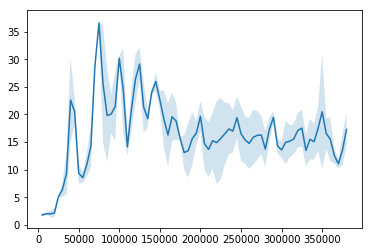

In [47]:
x = aligned_set.step()
y = aligned_set.mean()
std = aligned_set.std()
plt.figure()
plt.plot(x, y)
plt.fill_between(x, y - std, y + std, alpha=0.2)
plt.show()